#Titanic Survival

# Problem Statement

The dataset includes various types of features that can be categorised into demographic (e.g., Age, Sex), social (e.g., SibSp, Parch), and economic indicators (e.g., Pclass, Fare, Embarked). Perform a univariate analysis of the Titanic dataset to explore the individual characteristics of passengers, such as age distribution, passenger class composition, gender ratio, and survival rates. The objective is to understand the general patterns and trends within each variable.

Key Variables for Analysis:

Dependent Variable:
- Survived (whether a passenger survived or not)

Independent Variables:
- Pclass (Passenger class: socio-economic status)
- Sex (Gender)
- Age
- SibSp (Number of siblings/spouses aboard)
- Parch (Number of parents/children aboard)
- Fare
- Embarked (Port of embarkation)

###Assessing structure of the dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [3]:
df=pd.read_csv('titanic_dataset.csv')

In [5]:
df.shape

(891, 12)

In [7]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Poll Question 1

Choose the correct code option to print the null count in every column:

(a) df.isnull().count()

(b) df.isnull.count()

(c) df.isnull().sum()  ans:

(d) df.isnull.sum()

In [9]:
#additionally added
#print the null count in every column:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#Used to calculate the percentage of missing values in each column.
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [13]:
#Dropping this column.
df=df.drop("Cabin",axis=1)

In [15]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
dtype: float64

In [17]:
#Age column is filled with the median of the column to avoid any biases caused by extreme values.
df["Age"]=df["Age"].fillna(df["Age"].median())

In [19]:
#Checking for null values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

After dropping `Cabin`, the proportion of missing values is checked again.
Missing values in the `Age` column are filled with the median of the column to avoid any biases caused by extreme values:

In [21]:
# Remaining rows with any missing values are dropped with
df=df.dropna()

In [23]:
#Verify that all missing values have been successfully removed
df.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [25]:
# View the cleaned dataset.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
#Check the number of unique values for each feature to better understand categorical and continuous variables.
df.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

In [31]:
#Confirm the new dimensions of the cleaned dataset.
df.shape

(889, 11)

In [33]:
# Save the DataFrame to a CSV file
df.to_csv('titanic_dataset_cleaned.csv')

The cleaned version of the `Titanic` dataset with no missing values.

In [ ]:
# List of continuous (numerical) columns in the dataset
cont_cols = ["Fare", "Age"]

# List of categorical columns in the dataset
# Survived, Pclass, Sex, SibSp, Parch, and Embarked are categorical variables
cat_cols = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]

# List of identifier columns in the dataset
# These columns uniquely identify passengers but do not contribute to the analysis
id_cols = ["PassengerId", "Name", "Ticket"]

## Univariate Analysis

In [39]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

 The letters represent the port names (C = Cherbourg, Q = Queenstown, S = Southampton) - from the table, we can observe that most passengers boarded from the Southampton port.

Categorical variables consist of discrete categories, such as labels or groups. Common plots for categorical data include:

####Barplot

<Axes: xlabel='Pclass'>

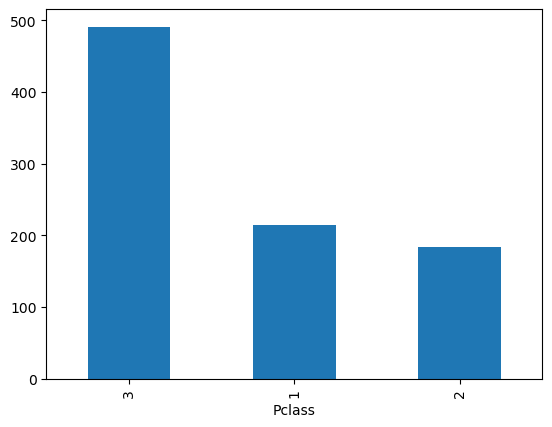

In [45]:
df['Pclass'].value_counts().plot(kind='bar')

The bar plot provides a simple and clear visual representation of how many passengers belong to each passenger class (1st, 2nd, or 3rd).

It gives a clear overview of the passenger composition by class, indicating that 3rd class had the most passengers, which helps in understanding both the socio-economic diversity of the passengers and provides a potential link to survival analysis, as passenger class was a significant factor affecting survival.

####Piechart

<Axes: ylabel='count'>

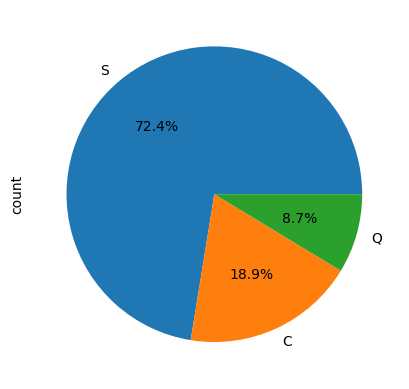

In [51]:
df['Embarked'].value_counts().plot(kind='pie', autopct='%1.1f%%')

A pie chart is used for displaying the proportion of categories as parts of a whole. In this case, it helps you easily see the percentage of passengers that embarked from different ports (C = Cherbourg, Q = Queenstown, S = Southampton).

The autopct=`%1.1f%%` parameter automatically labels each slice with the percentage of the total, making it easy to interpret the data.

The chart's labels make it easy to see that the majority of passengers embarked from Southampton, which makes sense given that it was the ship's main point of origin.

###Countplot

<Axes: xlabel='Embarked', ylabel='count'>

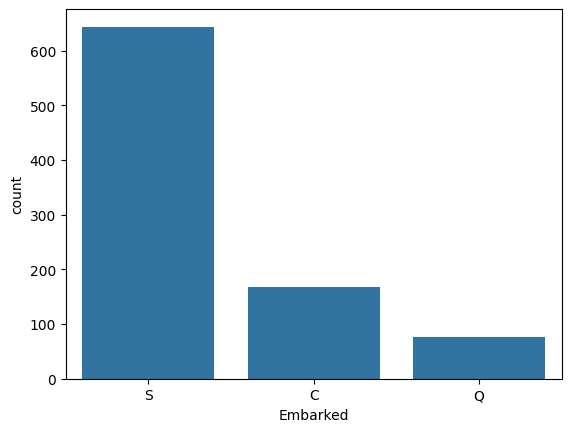

In [ ]:
sns.countplot(x=df["Embarked"]) #A countplot is a type of bar plot in data visualization that shows the frequency distribution of categorical data. It is commonly used in Python with the seaborn library, though it can also be created using matplotlib or pandas.

For the Titanic dataset, `sns.countplot(x=df["Embarked"])` will display the count of passengers  embarked from different ports (C = Cherbourg, Q = Queenstown, S = Southampton).


The bar for Southampton (S) is typically the tallest, indicating that the majority of passengers boarded the Titanic at Southampton.

#A count plot and a bar plot are similar in the sense that they are both used to visualise categorical data. A countplot counts the number of observations per category, while a barplot may sometimes estimates a summary statistic per category, such as the average.

Moving on, numerical data can either be continuous or discrete. The following plots are typically used for analysing the distribution and spread of continuous variables.

###Kernel Density Plot

<Axes: ylabel='Density'>

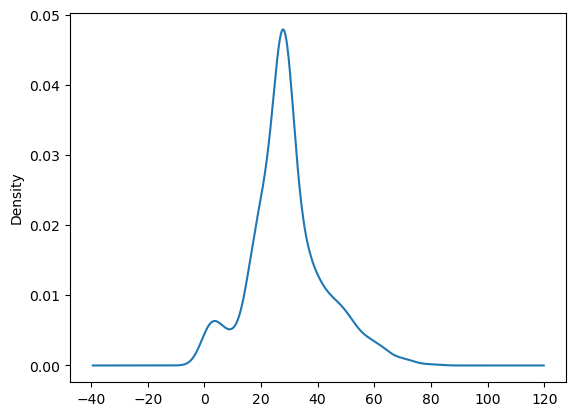

In [53]:
df['Age'].plot(kind='kde')

A KDE plot gives a smooth estimate of the **probability density function (PDF)** of the variable. It’s useful for understanding how the data is distributed in terms of where most values lie.

In this case, it shows the distribution of passenger's ages, helping identify age ranges where there are more passengers.

In the case of the Titanic dataset, the KDE plot for age generally shows a higher density for young adults (ages around 20-40), suggesting that this age group had the largest number of passengers.

In [ ]:
df['SibSp'].describe()

,SibSp
count,889.000000
mean,0.524184
std,1.103705
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,8.000000


### Histogram

It is used to see the bucket-wise distribution of a continuous variable.

### Poll Question 2:

Choose the correct code option to make the histogram using seaborn:

(a) plt.hist(df["Fare"])    ANS:   sns.histplot(df["Fare"])  

(b) plt.histplot(df["Fare"])

(c) plt.plot(df["Fare"]

(d) plt.histogram(df["Fare"]

(array([732., 104.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

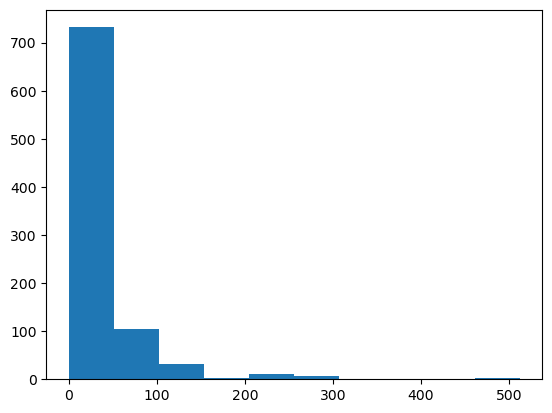

In [56]:
plt.hist(df["Fare"])  

Fare


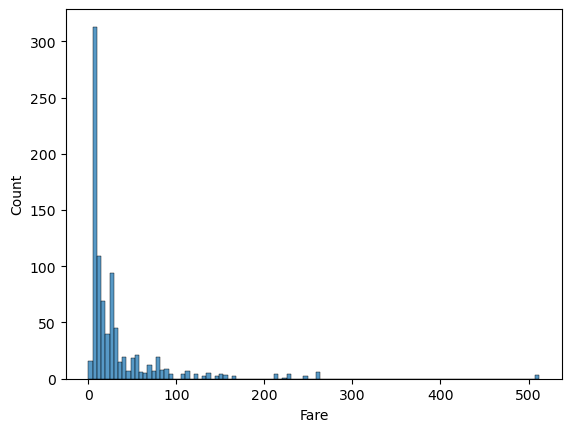

Age


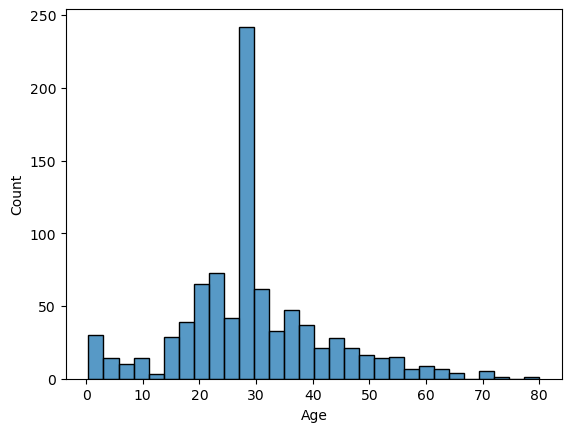

In [64]:
# Looping through each column in the continuous columns list (cont_cols)
for i in cont_cols:

    # Print the name of the current continuous column being processed
    print(i)

    # Plot a histogram for the current column using seaborn's histplot
    sns.histplot(df[i])

    # Display the plot after generating the histogram for the current column
    plt.show()

 The `Fare` histogram often displays a right-skewed distribution, with a majority of passengers paying lower fares and a few paying significantly higher fares.

The `Age` histogram typically displays a somewhat normal distribution, with a peak around $20-40$ years. This suggests that most passengers on the Titanic were young adults.

### Boxplot

<Axes: ylabel='Fare'>

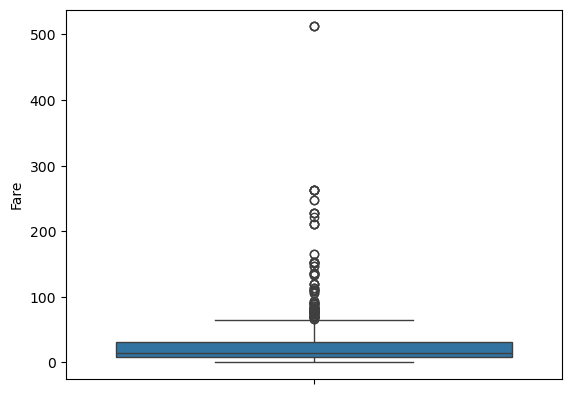

In [66]:
sns.boxplot(df["Fare"])

- It is used to see the quartile-wise distribution of a continuous variable.

- It is also used to see the outliers present in the data.

- Boxplots are also used to see the quartile-wise distribution of a continuous variable against categorical variables (e.g. distribution of sales across various categories).

Observations -

- Significant number of passengers paid
low fares, suggesting they were mostly third-class passengers.

- There are many outliers indicating high fare values, representing first-class passengers.

- The skewness in the boxplot highlights a disparity in ticket fares, with a small number of wealthy individuals paying significantly more compared to the rest of the passengers.

In [68]:
df["Fare"].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

###Scatterplot

<Axes: ylabel='Age'>

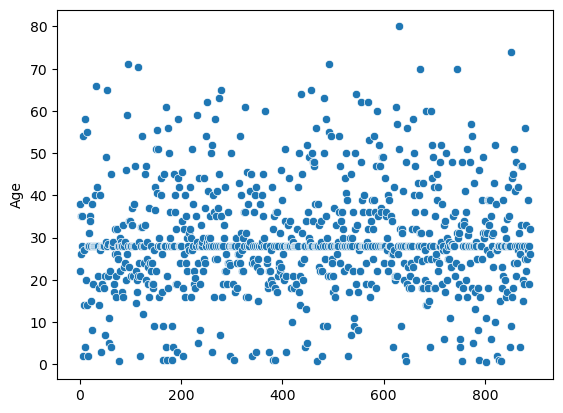

In [70]:
sns.scatterplot(df["Age"])

For the Titanic dataset, `sns.scatterplot(x=df["Age"])` will display the distribution of passengers across different age classes. Scatter plot is generally used for depicting relation between two numerical variables but it can also be used to plot a single numerical variable. It is also known as jittered dot plot.

The `x-axis` represents the index of the DataFrame, which is essentially the row number or the order of the passengers.
The `y-axis` represents the Age of each passenger, giving an overview of how passenger ages are distributed.


From the scatter plot, we can make the following observations:
- Young adults (ages $20-40$) make up the majority of the passengers, as indicated by the dense clustering of points.

- There are fewer passengers in the extreme age ranges (i.e., infants and elderly).

# E-Commerce Sales

### Problem Statement

The e-commerce platform aims to bolster its sales and improve customer satisfaction. To achieve these goals, performing a thorough univariate analysis of the available data is essential. This analysis will focus on identifying patterns and insights within individual variables that could inform strategic decisions.

### Dataset Description
The dataset in question is a comprehensive collection of data from an e-commerce platform, containing 500 records that illustrate the interplay between customers, orders, and products. This rich dataset provides a holistic view of the e-commerce operations, highlighting key aspects such as product offerings, customer demographics, and purchasing behaviors. Here are the core attributes included:

**OrderID**: Unique identifier for each transaction, allowing for detailed tracking of orders.

**CustomerID**: Identifies each customer, potentially showing repeat business and customer loyalty.

**ProductID**: Marks each product, indicating the range of items sold on the platform.

**Price**: Reflects the cost of products, from budget-friendly items to more premium offerings.

**Ratings**: A measure of customer satisfaction, rated on a scale from 1 to 5.

**Number_of_Reviews**: Indicates the popularity and customer engagement of products based on the volume of reviews.

**CategoryID**: Categorizes products into different segments, demonstrating the platform's product diversity.

**Age**: Provides insight into the customer base's demographic profile.

**Gender**: Indicates the gender distribution among the platform's customers.

**Location**: Shows the geographical distribution of customers, specifically within Indian cities in this case.

**Order_Date**: Dates of transactions, useful for analyzing sales trends over time.

## Importing the Libraries

In [72]:
## 1 - Import the libraries used for data manipulation in Python
import numpy as np
import pandas as pd

## Reading the Dataset

In [74]:
## 1 - Read the first dataset named "univariate_analysis_guided_practice.csv"
df_quiz = pd.read_csv("univariate_analysis_quiz.csv")

In [78]:
df_quiz.head()

,OrderID,CustomerID,ProductID,Price,Ratings,Number_of_Reviews,CategoryID,Age,Gender,Location,Order_Date
0,1,54,73,487.25,1.65,308,7,31,Other,Mumbai,2023-10-15
1,2,116,85,51.67,2.52,352,19,47,Other,Surat,2023-08-22
2,3,118,80,609.13,2.68,133,11,34,Male,Kolkata,2023-04-29
3,4,128,36,816.86,1.19,37,19,58,Other,Surat,2023-05-20
4,5,75,51,84.29,4.20,356,1,41,Male,Pune,2022-10-19


### Task - 1 (Histogram)

1 - Import the libraries necessary for Data Visualization.

2 - Set the size of the figure to (10 , 6).

3 - Create a histogram for the "Price" feature.

4 - Define the title, x & y label.

5 - Display the plot and note your observations.

6 - Set the size of the figure to (10 , 6).

7 - Create a histogram for the "Age" feature.

8 - Define the title, x & y label.

9 - Display the plot and note your observations.

In [76]:
# Code here
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

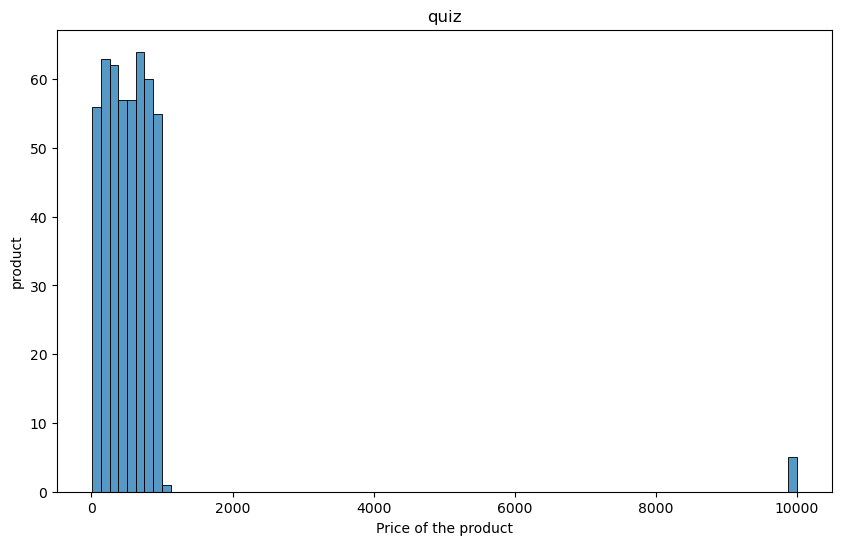

In [86]:

#Code here
plt.figure(figsize=(10,6))
sns.histplot(x=df_quiz['Price'])
plt.title('quiz')
plt.xlabel('Price of the product')
plt.ylabel('product')
plt.show()


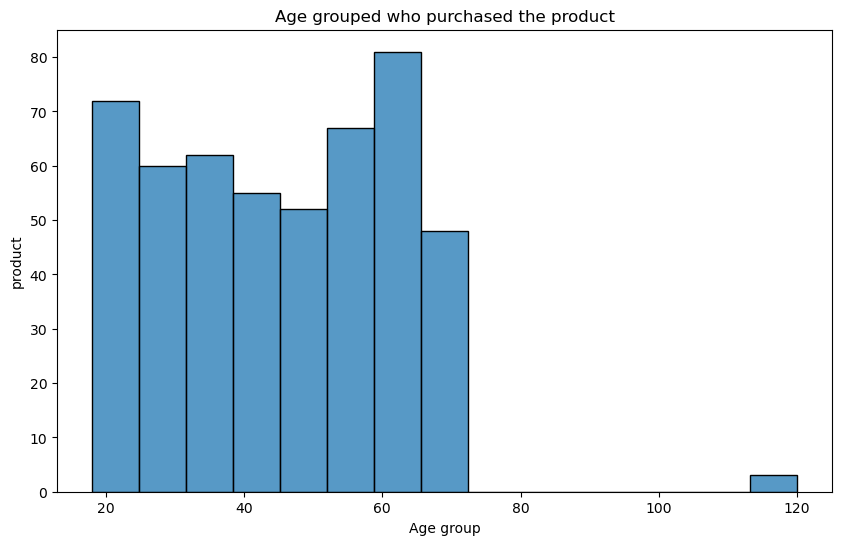

In [88]:
plt.figure(figsize=(10,6))
sns.histplot(x=df_quiz['Age'])
plt.title('Age grouped who purchased the product')
plt.xlabel('Age group')
plt.ylabel('product')
plt.show()

### Task - 2 (Box Plots)

1 - Set the size of the figure to (10 , 6).

2 - Create a box plot for "Ratings".

3 - Define the title, x & y label.

4 - Display the plot and note your observations.

5 - Set the size of the figure to (10 , 6).

6 - Create a box plot for "Age".

7 - Define the title, x & y label.

8 - Display the plot and note your observations.

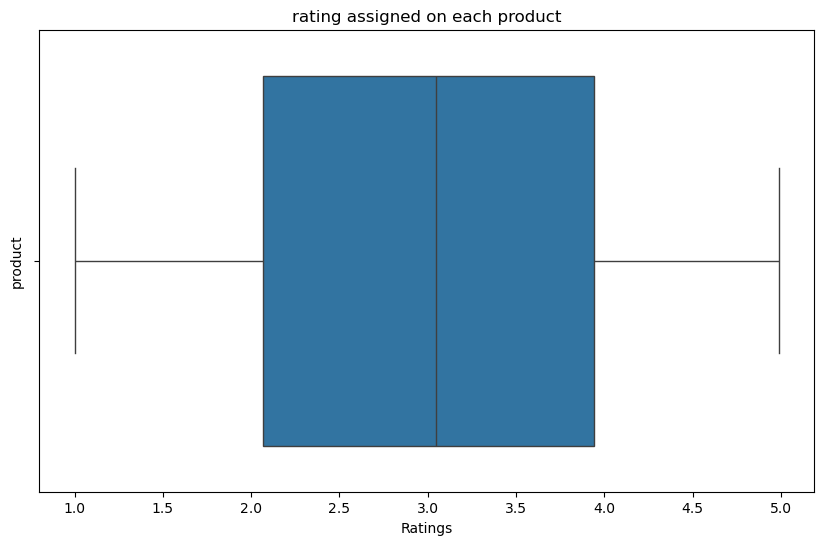

In [92]:
#Code here
plt.figure(figsize=(10,6))
sns.boxplot(x=df_quiz['Ratings'])
plt.title('rating assigned on each product')
plt.xlabel('Ratings')
plt.ylabel('product')
plt.show()

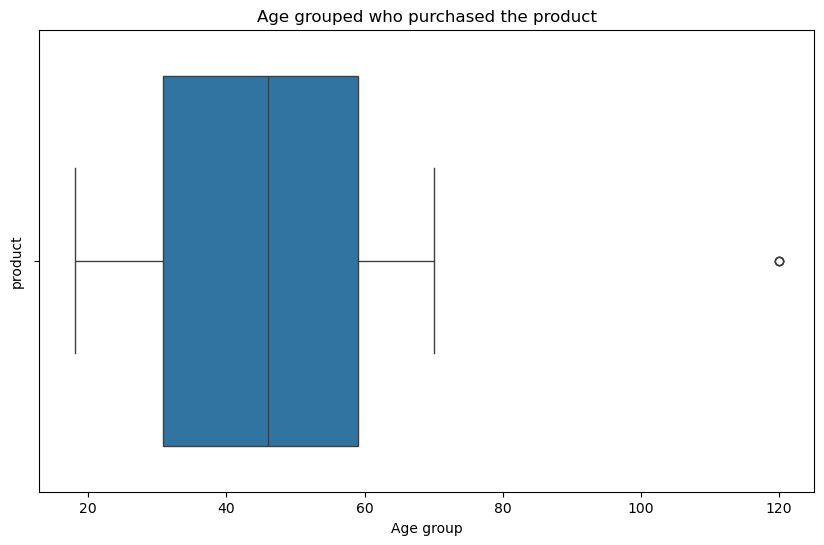

In [100]:
#Code here
plt.figure(figsize=(10,6))
sns.boxplot(x=df_quiz['Age'])
plt.title('Age grouped who purchased the product')
plt.xlabel('Age group')
plt.ylabel('product')
plt.show()

### Task - 3 (Bar Plots)
1 - Set the size of the figure to (10 , 6).

2 - Create a df to get the count of all the Categories inside the "Gender" feature.

3 - Create an instance of a bar plot for plotting these Categories.

4 - Define the title, x & y label.

5 - Display the plot and note your observations.

6 - Set the size of the figure to (10 , 6).

7 - Create a df to get the count of all the Categories inside the "CategoryID" feature.

8 - Create an instance of a bar plot for plotting these Categories.

9 - Define the title, x & y label.

10 - Display the plot and note your observations.

In [126]:
gender_value=df_quiz.Gender.value_counts(normalize= True)
gender_value
#inp0.Season.value_counts(normalize= True)

Gender
Other     0.366
Male      0.332
Female    0.302
Name: proportion, dtype: float64

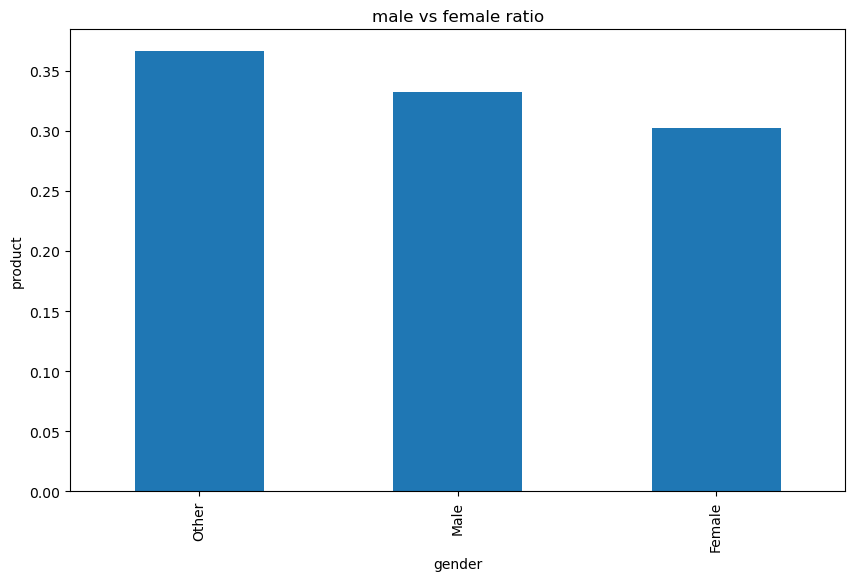

In [130]:
#Code here

plt.figure(figsize=(10,6))
#plt.plot(df_quiz['Gender'],kind='barh')
gender_value.plot(kind='bar')
plt.title('male vs female ratio')
plt.xlabel('gender')
plt.ylabel('product')
plt.show()

In [132]:
category_value=df_quiz.CategoryID.value_counts(normalize= True)
category_value

CategoryID
13    0.070
12    0.068
2     0.064
20    0.064
15    0.058
8     0.058
9     0.056
19    0.056
6     0.052
3     0.050
18    0.046
10    0.046
7     0.044
5     0.044
4     0.042
1     0.042
11    0.042
14    0.040
16    0.032
17    0.026
Name: proportion, dtype: float64

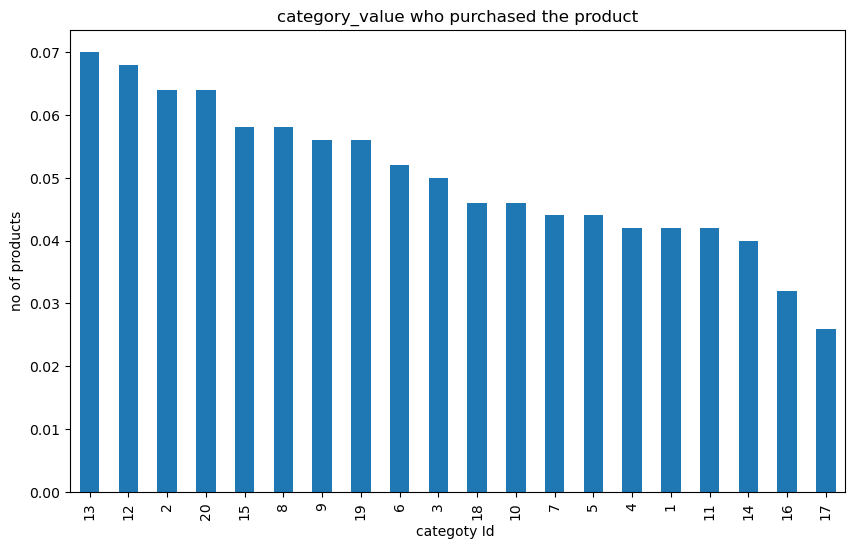

In [134]:
#Code here
plt.figure(figsize=(10,6))
category_value.plot(kind='bar')
plt.title('category_value who purchased the product')
plt.xlabel('categoty Id ')
plt.ylabel('no of products')
plt.show()

In this session, you learnt how to perform univariate analysis, which is an essential first step in understanding a dataset. Univariate analysis focused on one variable at a time, and it helped us identify key characteristics such as the distribution, central tendency, spread, and presence of outliers in the Titanic and E-Commerce Sales dataset.